# 🎬 TMDB Movie Success Analysis
Using the TMDB movie dataset to explore what makes a movie successful with Pandas, Matplotlib, and Regression.

In [12]:
# 📦 Import Libraries
import pandas as pd # Data manipulation
import numpy as np
import matplotlib.pyplot as plt # Plotting library
import seaborn as sns # Data visualization
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Previous WS recap

Explain each function. 

In [13]:
# also recap the data science process, or explain it (put it on slides or something)

# 📥 Load Titanic Dataset (for exploratory analysis)
df = sns.load_dataset('titanic') # Load the Titanic dataset from seaborn
df.head() # Load first 5 rows of df


# 📊 Get dataset overview
df.info() # Print summary info: column names, data types, non-null counts
df.describe() # Show summary statistics (mean, min, max, etc.)
df.isnull().sum() # Count the number of missing values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

First step of data science process is understanding the problem explore 

In [14]:
# 📥 Load TMDB Movies Dataset
df = pd.read_csv('tmdb-movies.csv') # Load the dataset from a CSV file
df.head() # Display the first 5 rows

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:

# 📝 Check dataset information
print(df.info()) # Print column names, data types, and non-null counts
df.describe() # Show statistical summaries (e.g., mean, std, min, max)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Need to explain + understand:
- dropna, subset, inplace
- df[df]

## 🧹 Data Cleaning - explain

In [16]:
# 🔍 Data Cleaning: Removing duplicates and handling missing values
df.drop_duplicates(inplace=True) # Remove duplicate rows
df.dropna(subset=['budget_adj', 'revenue_adj', 'release_year'], inplace=True) # Drop rows with missing critical values

# 🎯 Feature Engineering: Creating a new profit column
df['profit_adj'] = df['revenue_adj'] - df['budget_adj'] # Compute adjusted profit

# 🗑️ Removing unrealistic data (Zero budget or revenue movies)
df = df[df['budget_adj'] > 0]   # Keep only movies with a nonzero budget
df = df[df['revenue_adj'] > 0]  # Keep only movies with a nonzero revenue

# 📈 Display the cleaned dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


## 📊 Exploratory Data Analysis - explain

In [17]:
# 🏆 Top 10 Most Profitable Movies (explain each function), explain each part separately
df[['original_title', 'profit_adj']].sort_values(by='profit_adj', ascending=False).head(10)

,original_title,profit_adj
1329,Star Wars,2.750137e+09
1386,Avatar,2.586237e+09
5231,Titanic,2.234714e+09
10594,The Exorcist,2.128036e+09
9806,Jaws,1.878643e+09
8889,E.T. the Extra-Terrestrial,1.767968e+09
3,Star Wars: The Force Awakens,1.718723e+09
8094,The Net,1.551568e+09
10110,One Hundred and One Dalmatians,1.545635e+09
7309,The Empire Strikes Back,1.376998e+09


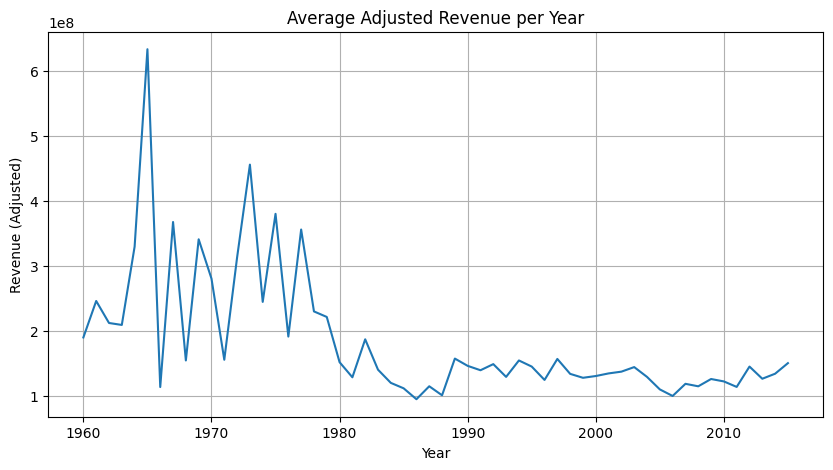

In [18]:
# Revenue by year
df.groupby('release_year')['revenue_adj'].mean().plot(figsize=(10,5))
plt.title('Average Adjusted Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Revenue (Adjusted)')
plt.grid(True)
plt.show()

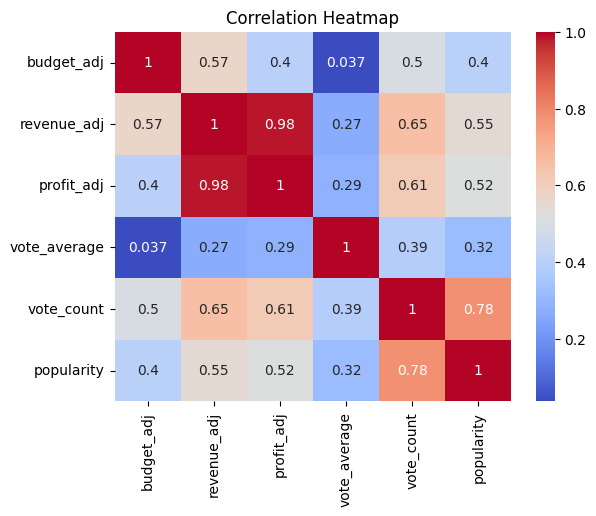

In [19]:
# Correlation heatmap 
# What is a correlation heatmap - explain

# Compute correlation matrix
# explain confusion matrix
corr = df[['budget_adj', 'revenue_adj', 'profit_adj', 'vote_average', 'vote_count', 'popularity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Alex can explain this bit: Uses pearson's correlation coefficient to calculate (measures how strongly related two variables are)
Value from -1 to 1, basically how well values align with a straight line.

How pearson's is caculated:
1. Find how far each value is from its mean
- how above or below average each number is??

2. Multiply those distances together for each row

3. Divide that by how “spread out” the two columns are (this is called standard deviation)


But now you ask what if the relationship wasn't linear? Its a great question because a lot of the time irl data is not gonna be proportionate to eachother,

well the answer is quite simple but to understand it would be probably getting off topic on what we need to do today but basically as pearson's correlation coefficient is merely a method we use to model linear relationships we simply need to use another method to model non-linear relationships


Spearman
SACK!!!!!!!!!
Research in own time if you're curious
Use when: you think one goes up as the other goes up — but not in a straight line
It asks: “When one goes up, does the other also go up — in general?”

Higher popularity → generally more revenue, but not perfectly steady
Use it when the pattern curves but still goes in one direction overall.

## 🤖 Predicting Revenue with Linear Regression
Suppose we wish to find out based on our data of budget_adj, popularity, vote_average, how much that will influence the revenue adj.
Suppose we have data for a new movie on budget_adj, popularity, vote_average and we want to predict the new movie's revenue adj.

it’s called Multivariate Linear Regression, but the algorithm is still "linear"

📌 So what does "linear" mean in this context?
It means the model tries to fit a straight-line relationship between the inputs (features) and the output (target) — no matter how many features you use.

One feature → simple line
Two features → regression plane (3D)
Three+ features → regression hyperplane (4D, 5D...)
And LinearRegression() fits that line/plane/hyperplane — it scales automatically!

In [ ]:
# Prepare data
X = df[['budget_adj', 'popularity', 'vote_average']]
y = df['revenue_adj']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Why do we split training and test data?
# We split the training into 80% training and 20% testing to see how well it does on new/unseen data

# Train model
model = LinearRegression()
model.fit(X_train, y_train) # learn relationship between features and the label
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
# What does each of these factors tell us
# coefficient of determination (pearson squared)
print('R-squared:', r2_score(y_test, y_pred)) 
# How much of the variation in Y (dependent var) is explained by X (independent var)
# i.e 70% of the difference in movie revenues can be explained by budget and popularity.
# # The remaining 30% is due to other stuff your model doesn’t account for — like cast, marketing, release timing, etc.
print('RMSE:', mean_squared_error(y_test, y_pred))
# Root Mean Squared Error - how far off the what predictions are, on average (measured in the same units as Y)
# So here we're looking for a better number
# Calculated by taking the square root of the average of the squared differences between predicted and actual values

R-squared: 0.5118936428829327
RMSE: 2.6556754888010336e+16


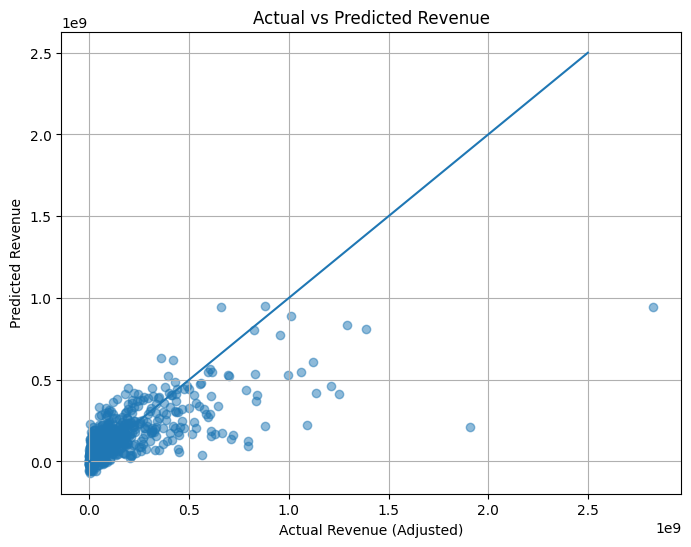

In [38]:
# Plot predictions vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Revenue (Adjusted)')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.grid(True)
plt.plot(np.arange(0, 2.5*10**9, 10000), np.arange(0, 2.5*10**9, 10000))
plt.show()

Why did we use 3 features instead of just 1?
Real world outcomes are influenced by multiple factors.

Revenue is not just about how much money you put into a movie. Think about it:
Budget – Bigger budgets often mean better production quality & marketing
Popularity – Reflects public interest, buzz, or hype
Vote average – Reflects how well audiences actually liked the movie

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression

features = ['budget_adj', 'popularity']
X = df[features]
y = df['revenue_adj']
model = LinearRegression()
model.fit(X, y)

x_range = np.linspace(X['budget_adj'].min(), X['budget_adj'].max(), 30)
y_range = np.linspace(X['popularity'].min(), X['popularity'].max(), 30)
x_surf, y_surf = np.meshgrid(x_range, y_range)
z_pred = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

scatter = go.Scatter3d(
    x=X['budget_adj'],
    y=X['popularity'],
    z=y,
    mode='markers',
    marker=dict(size=3, color='blue'),
    name='Actual Data'
)

surface = go.Surface(
    x=x_surf,
    y=y_surf,
    z=z_pred,
    colorscale='Viridis',
    opacity=0.5,
    name='Regression Plane'
)

layout = go.Layout(
    title='Interactive 3D Regression: Budget vs Popularity vs Revenue',
    scene=dict(
        xaxis_title='Budget (Adjusted)',
        yaxis_title='Popularity',
        zaxis_title='Revenue (Adjusted)'
    ),
    width=800,
    height=600
)

fig = go.Figure(data=[scatter, surface], layout=layout)
fig.show()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

